In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, f1_score


In [2]:
fish = pd.read_csv("Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [4]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [5]:
fish.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [6]:
fiFsh['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

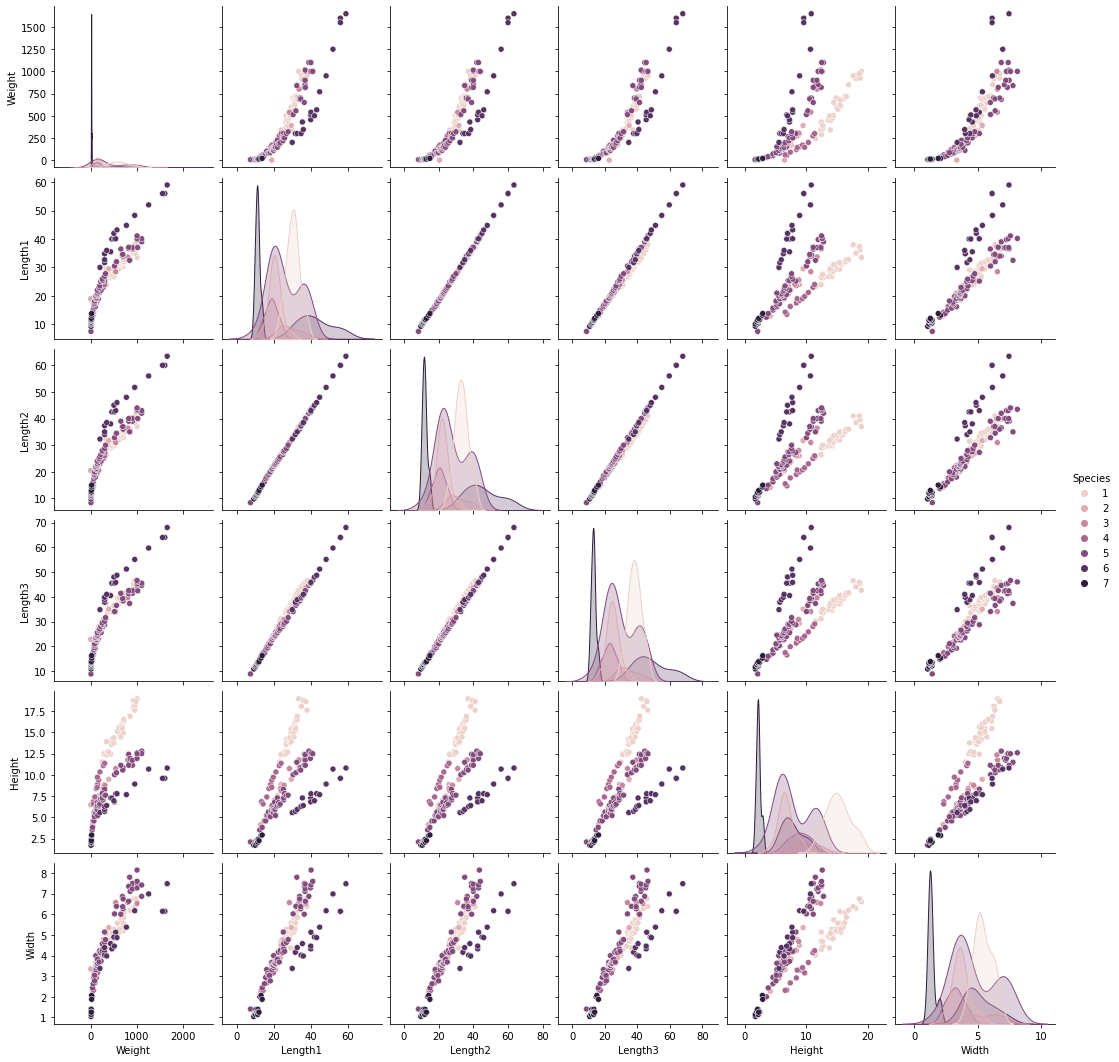

In [38]:

sns.set_palette('rocket')
sns.pairplot(fish, hue='Species')


[Text(0.5, 1.0, 'Fish Length1 barplot')]

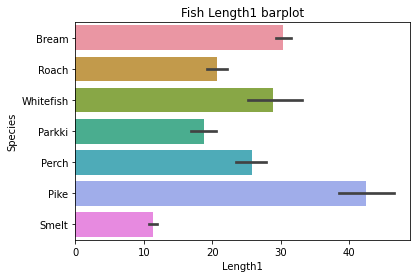

In [8]:
sns.barplot(x='Length1', y='Species', data = fish).set(title='Fish Length1 barplot')


[Text(0.5, 1.0, 'Fish Length2 barplot')]

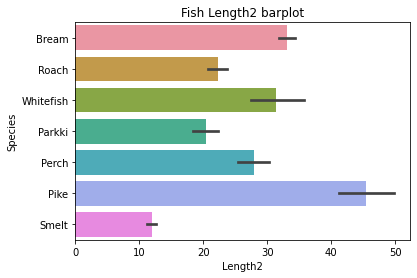

In [9]:
sns.barplot(x='Length2', y='Species', data = fish).set(title='Fish Length2 barplot')


[Text(0.5, 1.0, 'Fish Length3 barplot')]

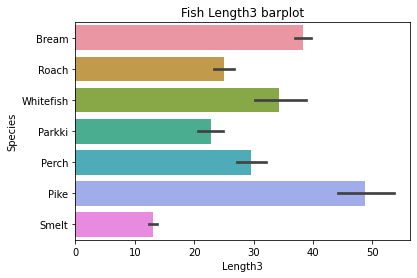

In [10]:
sns.barplot(x='Length3', y='Species', data = fish).set(title='Fish Length3 barplot')


[Text(0.5, 1.0, 'Fish weight')]

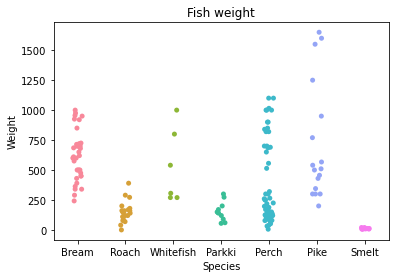

In [11]:
sns.stripplot(x='Species', y='Weight', data=fish).set(title='Fish weight')


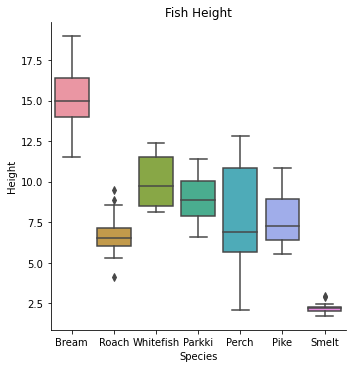

In [12]:

sns.catplot(x='Species', y='Height', kind='box', data=fish).set(title='Fish Height')

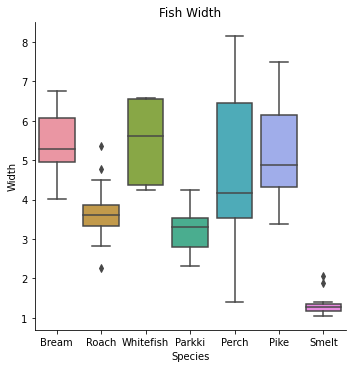

In [13]:
sns.catplot(x='Species', y='Width', kind='box', data=fish).set(title='Fish Width')


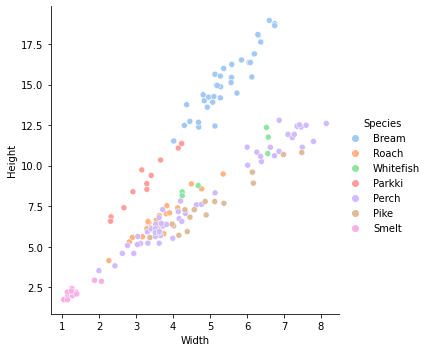

In [14]:
sns.relplot(x='Width', y='Height', hue = 'Species', data = fish, palette = 'pastel')

In [ ]:
sns.relplot(x='Width', y='Height', hue = 'Species', data = fish, palette = 'pastel')

In [15]:
fish['Species'] = pd.factorize(fish['Species'])[0] + 1
fish['Species'].value_counts()

5    56
1    35
2    20
6    17
7    14
4    11
3     6
Name: Species, dtype: int64

In [16]:
o = (fish.dtypes == 'object')
object_col = o[o].index
print(f'Categorical Column: {object_col}')

f = (fish.dtypes == 'float')
float_col = f[f].index 
print(f'Float column: {float_col}')

Categorical Column: Index([], dtype='object')
Float column: Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


In [17]:
for i in fish[object_col] : 
    print(f'{i} : {fish[i].unique()}')

In [18]:
for i in fish[float_col] : 
    print(f'{i}: {fish[i].unique()}')

Weight: [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
Length1: [23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 28.4 28.7 29.1 29.5 29.4 30.4
 30.9 31.  31.3 31.4 31.5 31.8 31.9 32.  32.7 32.8 33.5 35.  36.2 37.4
 38.  12.9 16.5 17.5 18.2 18.6 19.  19.1 19.4 20.4 20.5 21.  21.1 22.
 22.1 23.6 25.  24.1 25.6 33.7 37.3 13.5 14.3 16.3 18.4 19.8

In [19]:
label = fish['Species']
feature = fish.iloc[: , 1:]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size = 0.2)
print(f'X_train shape : {x_train.shape}')
print(f'Y_train shape : {y_train.shape}')
print(f'X_test shape : {x_test.shape}')
print(f'Y_test shape : {y_test.shape}')

X_train shape : (127, 6)
Y_train shape : (127,)
X_test shape : (32, 6)
Y_test shape : (32,)


In [44]:
model = RandomForestClassifier(random_state = 42 , max_depth =  8, max_features =  'auto', n_estimators =  200)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [45]:
y_pred = model.predict(x_test)

In [46]:
print(f'RFC report :\n {classification_report(y_test,y_pred)}')

RFC report :
               precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       0.61      0.85      0.71        13
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.69        32
   macro avg       0.61      0.66      0.63        32
weighted avg       0.60      0.69      0.63        32



In [24]:
score = accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {score}')

Accuracy Score : 0.8125


In [25]:
fish['Species'] = pd.factorize(fish['Species'])[0] + 1
fish['Species'].value_counts()
X = fish.drop(["Species", "Weight"], axis = 1)
y = fish['Species']

In [26]:
fish_id = fish.drop(['Species', 'Length1', 'Weight'], axis = 1)
X_fish = fish.drop('Species', axis = 1)
y_fish = fish['Species']
X_train, X_test, y_train, y_test = train_test_split(X_fish, y_fish, test_size=0.3)

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.5625

In [29]:
y_pred = gnb.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5625


In [32]:
gnb_fish = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.5625